In [247]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

plt.style.use("seaborn")

In [248]:
def plot(times, temp, temp_target, extrude, step, filename):

    plt.plot(temp, label="Nozzle Temperature")
    plt.plot(temp_target, label="Target Temperature")
    plt.plot(extrude, label="Extrustion Start")

    plt.xlim(step - 50, step + 200)
    plt.ylim(198, 203)

    plt.xlabel("Temperature / C")
    plt.xlabel("Time / s")

    plt.legend()

    plt.savefig("figures/" + filename + ".png", dpi=200)
    plt.show()


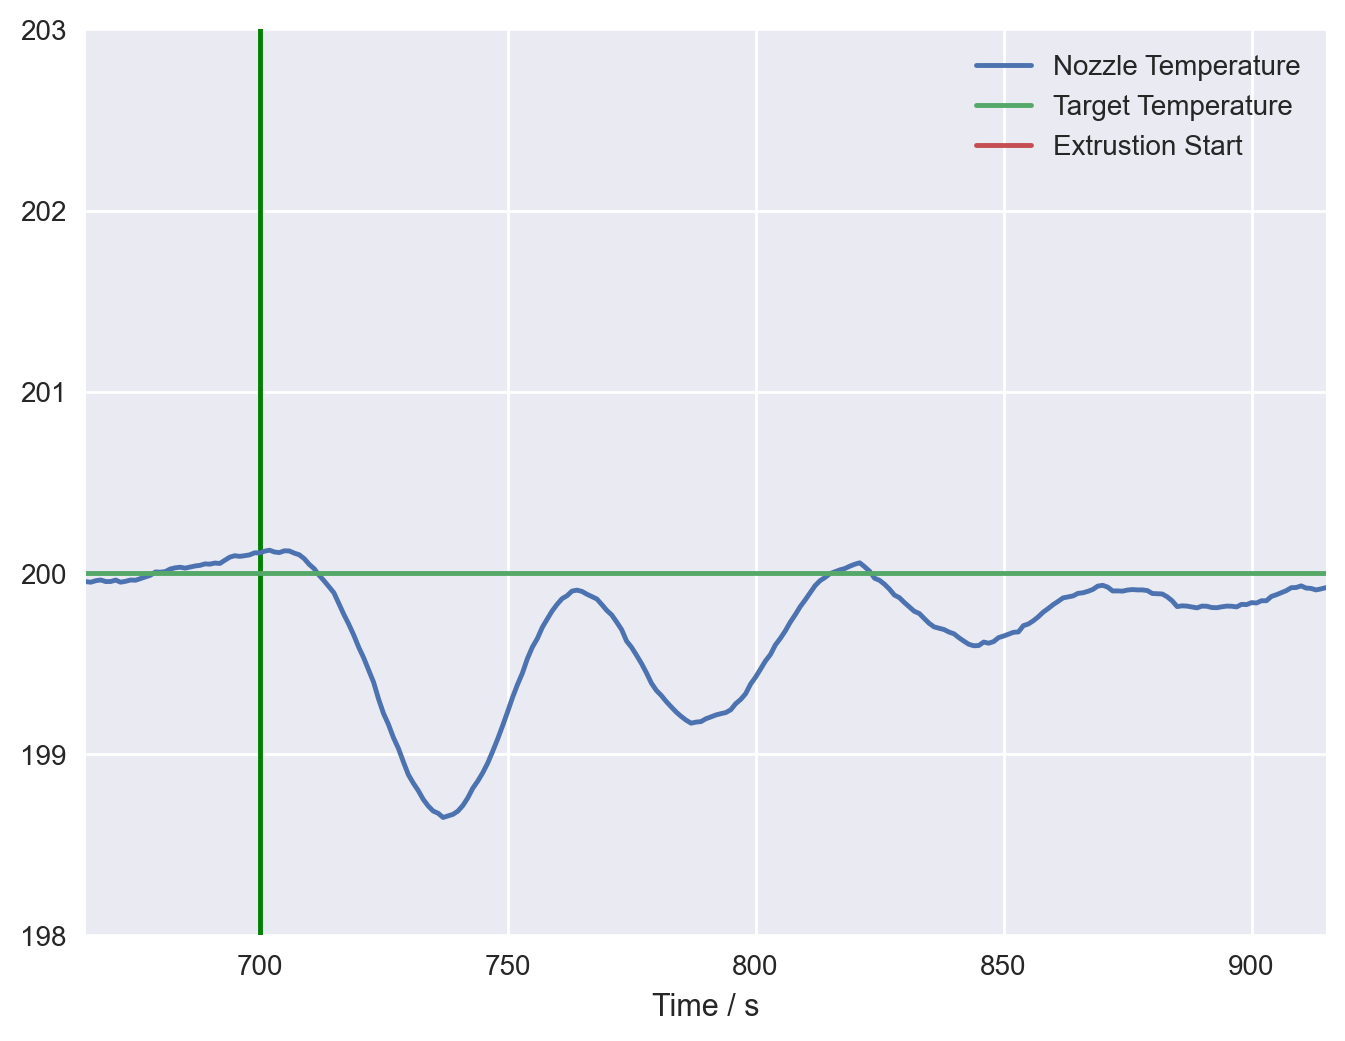

198.65095698654505


In [249]:
temp = np.load("PID_tests/EXTRUDE_test_1644247807.3613567_temp.npy")
tempD = savgol_filter(temp, 51, 3)
times = np.load("PID_tests/EXTRUDE_test_1644247807.3613567_times.npy")

plt.figure(figsize=(8,6), dpi=200)
plt.vlines(700, 0, 300, color="r")
plot(times, tempD, np.zeros_like(temp) + 200, np.zeros_like(temp), 715, "response")
print(min(tempD[650:900]))

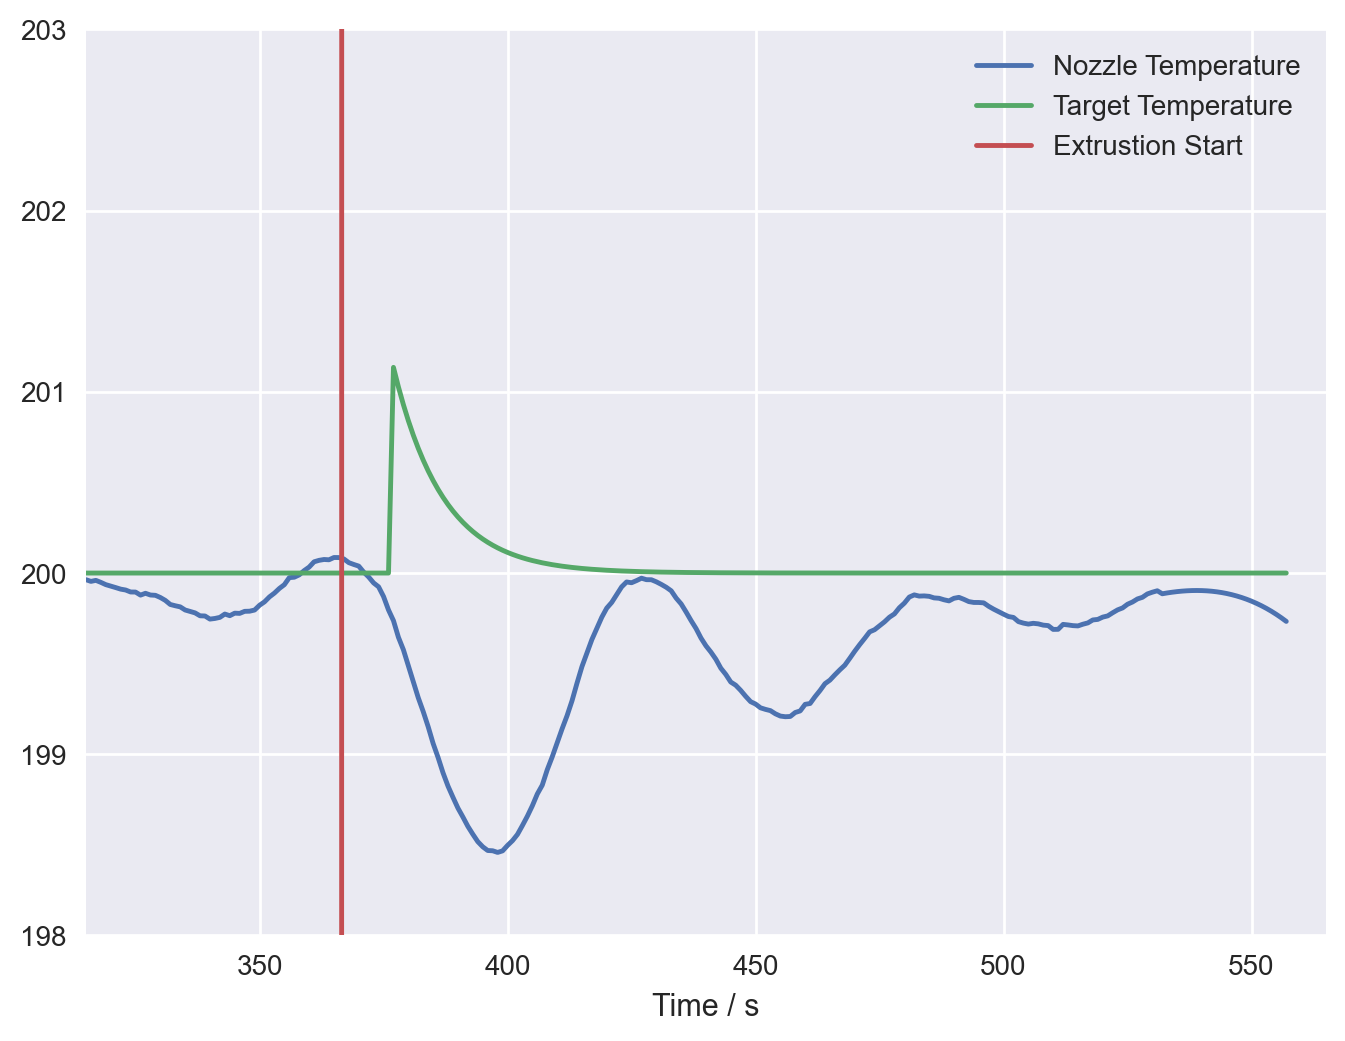

198.45821649412164


In [250]:
temp_target = np.load("PID_tests/EXTRUDE_FF_1644325716.4835196_temp_target.npy")
extrude = np.load("PID_tests/EXTRUDE_FF_1644325716.4835196_extrude.npy")
temp = np.load("PID_tests/EXTRUDE_FF_1644325716.4835196_temp.npy")
tempFF1 = savgol_filter(temp, 51, 3)
times = np.load("PID_tests/EXTRUDE_FF_1644325716.4835196_times.npy")

plt.figure(figsize=(8,6), dpi=200)
plot(times, tempFF1, temp_target, extrude, 365, "ff1")
print(min(tempFF1[250:550]))

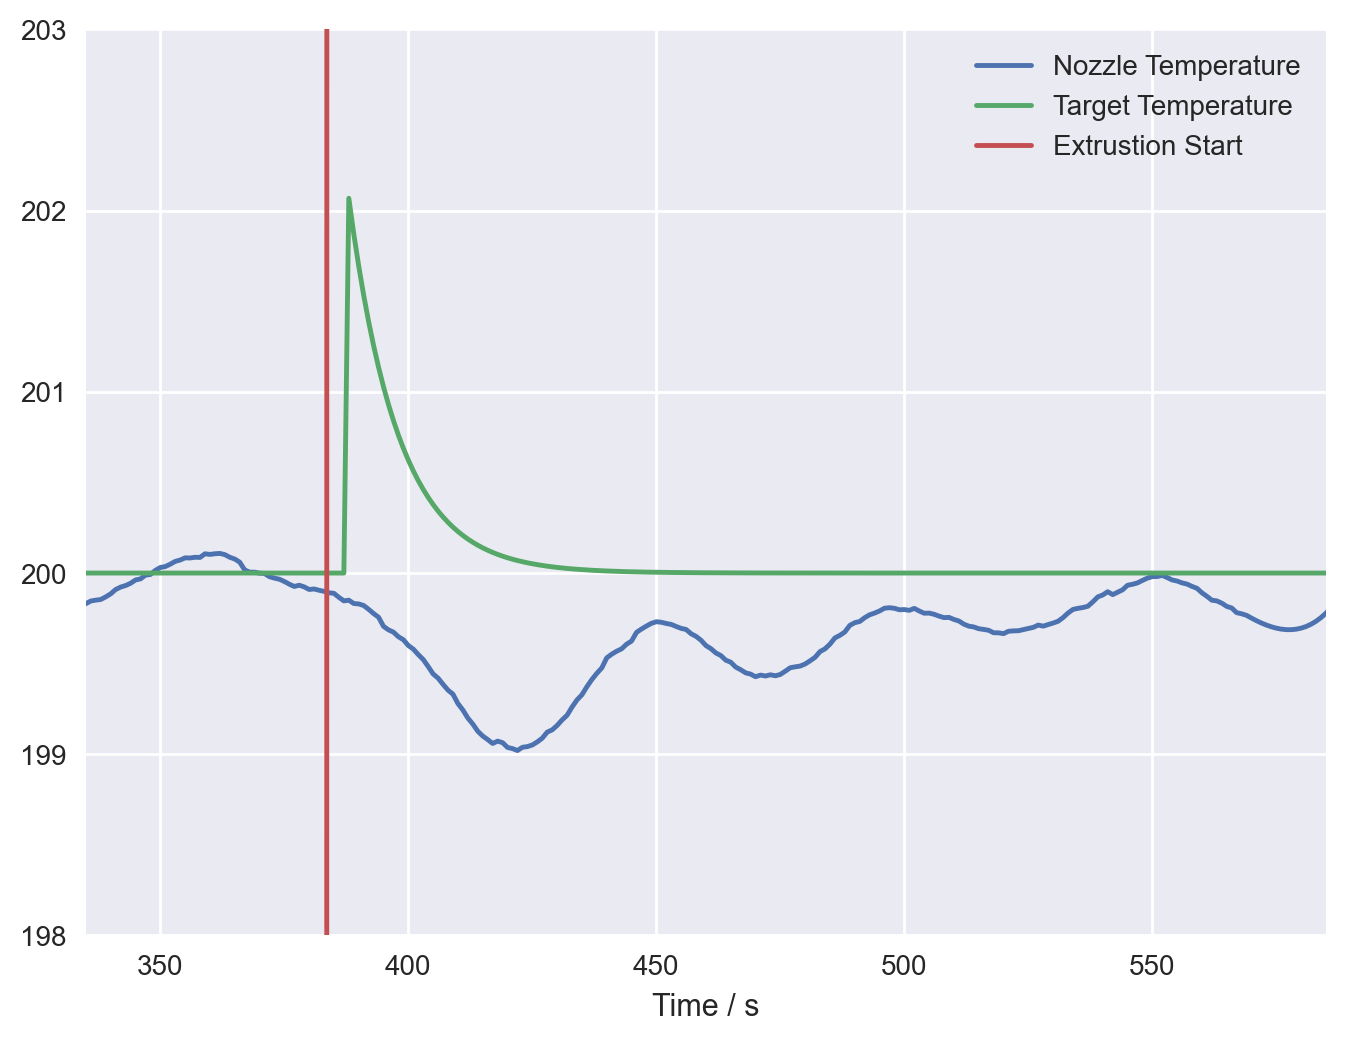

199.02049197034987


In [251]:
temp_target = np.load("PID_tests/EXTRUDE_FF_2_1644326302.3080046_temp_target.npy")
extrude = np.load("PID_tests/EXTRUDE_FF_2_1644326302.3080046_extrude.npy")
temp = np.load("PID_tests/EXTRUDE_FF_2_1644326302.3080046_temp.npy")
tempFF2 = savgol_filter(temp, 51, 3)
times = np.load("PID_tests/EXTRUDE_FF_2_1644326302.3080046_times.npy")

plt.figure(figsize=(8,6), dpi=200)
plot(times, tempFF2, temp_target, extrude, 385, "ff2")
print(min(tempFF2[250:550]))

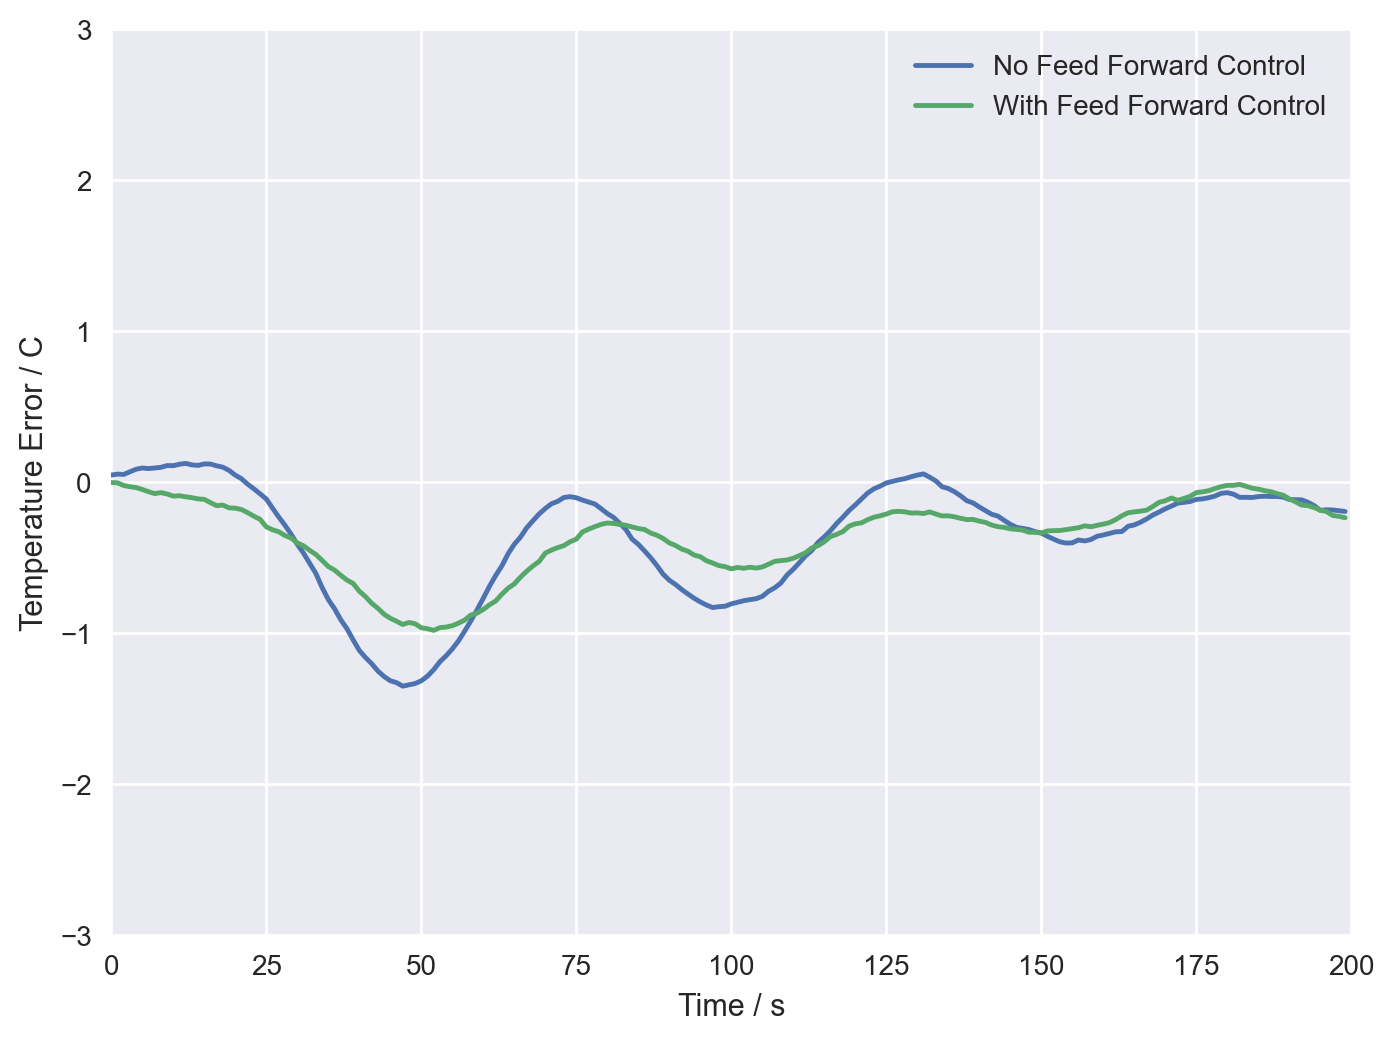

In [252]:
T = tempD[690:890] - 200 
TFF = tempFF2[370:570] - 200

plt.figure(figsize=(8,6), dpi=200)
plt.plot(T, label="No Feed Forward Control")
plt.plot(TFF, label="With Feed Forward Control")
plt.ylim(-3, 3)
plt.xlim(0, 200)
plt.ylabel("Temperature Error / C")
plt.xlabel("Time / s")
plt.legend()
plt.savefig("figures/comparison.png", dpi=200)
plt.show()


In [253]:
print(np.mean(np.square(T)))
print(np.mean(np.square(TFF)))

0.2775735222924196
0.1902760001382485
